<a href="https://colab.research.google.com/github/bundickm/CheatSheets/blob/master/Linear_Algebra_PCA_and_Clustering_Cheat_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resources
[Numpy Linear Algebra Documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html)

[LaTex Cheat Sheet](https://wch.github.io/latexsheet/latexsheet.pdf)

#Basic Linear Algebra

In [0]:
import numpy as np
import matplotlib.pyplot as plt

##Scalars

###Definition
A single number. Variables representing scalars are typically written in lower case.

Scalars can be whole numbers or decimals.

\begin{align}
a = 2
\qquad
b = 4.815162342
\end{align}

They can be positive, negative, 0 or any other real number.

\begin{align}
c = -6.022\mathrm{e}{+23}
\qquad
d = \pi
\end{align}

In [0]:
scalar = 5
vector = [1,2]
matrix = [[1,2],
          [3,4]]

print('Scalar-Vector Multiplication:',np.multiply(scalar, vector))
print('Scalar-Matrix Multiplication:\n',np.multiply(scalar, matrix))

Scalar-Vector Multiplication: [ 5 10]
Scalar-Matrix Multiplication:
 [[ 5 10]
 [15 20]]


##Vectors

###Definition
A vector of dimension *n* is an **ordered** collection of *n* elements, which are called **components** (Note, the components of a vector are **not** referred to as "scalars"). Vector notation variables are commonly written as a bold-faced lowercase letters or italicized non-bold-faced lowercase characters with an arrow (→) above the letters:

Written: $\vec{v}$ 

Examples:

\begin{align}
   \vec{a} = 
   \begin{bmatrix}
           1\\
           2
    \end{bmatrix}
    \qquad
    \vec{b} =
    \begin{bmatrix}
          -1\\
           0\\
           2
    \end{bmatrix}
    \qquad
    \vec{c} =
    \begin{bmatrix}
           4.5
    \end{bmatrix}
    \qquad
    \vec{d} =
    \begin{bmatrix}
           Pl\\
           a\\
           b\\
           \frac{2}{3}
    \end{bmatrix}
\end{align}

The above vectors have dimensions 2, 3, 1, and 4 respectively.

### Norm of a Vector (Magnitude or length)

The *Norm* or *Magnitude* of a vector is  the **length** of the vector. Since a vector is basically a line, if you treat it as the hypotenuse of a triangle you can use the pythagorean theorem to find the equation for the norm of a vector. We're essentially just generalizing the equation for the hypotenuse of a triangle that results from the pythagorean theorem to n dimensional space.

We denote the norm of a vector by wrapping it in double pipes. The Norm is the square root of the sum of the squared elements of a vector.
\begin{align}
||v|| = 
\sqrt{v_{1}^2 + v_{2}^2 + \ldots + v_{n}^2}
\\
\vec{a} = 
\begin{bmatrix}
3 & 7 & 2 & 4
\end{bmatrix}
\\
||a|| = \sqrt{3^2 + 7^2 + 2^2 + 4^2} \\
||a|| = \sqrt{9 + 49 + 4 + 16} \\
||a|| = \sqrt{78}
\end{align}


Properties of the Norm:

* The norm is always positive or zero $||x|| \geq 0$ 

* The norm is only equal to zero if all of the elements of the vector are zero.

* The Triangle Inequality: $|| x + y ||\leq ||x|| + ||y||$


In [0]:
def vector_norm(vector):
  return (sum([vector[i]**2 for i in range(len(vector))])**.5)

### Dot Product

The dot product of two vectors $\vec{a}$ and $\vec{b}$ is a scalar quantity that is equal to the sum of pair-wise products of the components of vectors a and b. An example will make this make much more sense:

\begin{align} \vec{a} \cdot \vec{b} = (a_{1} \times b_{1}) + (a_{2} \times b_{2}) + \ldots + ( a_{n} \times b_{n}) \end{align}

Example:

\begin{align}
\vec{a} = 
\begin{bmatrix}
3 & 7 & 2 & 4
\end{bmatrix}
\qquad
\vec{b} = 
\begin{bmatrix}
4 & 1 & 12 & 6
\end{bmatrix}
\end{align}

The dot product of two vectors would be:
\begin{align}
a \cdot b = (3)(4) + (7)(1) + (2)(12) + (4)(6) \\ 
= 12 + 7 + 24 + 24  \\
= 67
\end{align}

The dot product is commutative: $ a \cdot b = b \cdot a$

The dot product is distributive: $a \cdot (b + c) = a \cdot b + a \cdot c$

Two vectors must have the same number of components in order for the dot product to exist. If they lengths differ the dot product is undefined.

In [0]:
def vector_dot_product(vector1, vector2):
  assert len(vector1) == len(vector2), 'Expected Vectors of Equal Length'
  
  return sum([vector1[i]*vector2[i] for i in range(len(vector1))])

### Cross Product

The Cross Product is the vector equivalent of multiplication. The result is a third vector that is perpendicular to the first two vectors.

It is written with a regular looking multiplication sign like $a \times b$ but it is read as "a cross b"

The cross product equation is a little complicated, and gaining an intuition for it is going to take a little bit more time than we have here. I think it's the least useful of the vector operations, but I'll give you a short example anyway.


Assume that we have vectors $x$ and $y$.

\begin{align}
x = \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\qquad
y = \begin{bmatrix} y_1 & y_2 & y_3 \end{bmatrix}
\end{align}

The cross product can be found by taking these two vectors and adding a third unit vector to create a 3x3 matrix and then finding the determinant of the 3x3 matrix like follows:

$$
x = \begin{vmatrix} i & j & k \\  x_1 & x_2 & x_3 \\  y_1 & y_2 & y_3 \end{vmatrix} = i\begin{vmatrix} x_2 & x_3 \\ y_2 & y_3 \end{vmatrix} + j\begin{vmatrix}x_1 & x_3 \\y_1 & y_3\end{vmatrix} + k\begin{vmatrix}x_1 & x_2 \\y_1 & y_2\end{vmatrix} = 
\\
\\
i(x_2y_3-x_3y_2) - j(x_1y_3-x_3y_1) + k(x_1y_2-x_2y_1)
$$




## Matrices

###Definition
A rectangular grid of numbers arranged in rows and columns. Variables that represent matrices are typically written as capital letters (boldfaced as well if you want to be super formal).

\begin{align}
A = 
    \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6\\
           7 & 8 & 9
    \end{bmatrix}
    \qquad
    B = \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6
    \end{bmatrix}
 \end{align}


### Dimensionality

The number of rows and columns that a matrix has is called its **dimension**.

When listing the dimension of a matrix we always list rows first and then columns. 

The dimension of matrix A is 3x3, and the dimensions of B are 2x3

### Matrix Equality

In order for two Matrices to be equal the following conditions must be true:

1) They must have the same dimensions.

2) Corresponding elements must be equal.

\begin{align}
    \begin{bmatrix}
           1 & 4\\
           2 & 5\\
           3 & 6 
    \end{bmatrix} 
    \neq
    \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6
    \end{bmatrix}
\end{align}

### Matrix Multiplication

You can multipy any two matrices where the number of  columns of the first matrix is equal to the number of rows of the second matrix.

The unused dimensions of the factor matrices tell you what the dimensions of the product matrix will be.

<center>![Matrix Multiplication Dimensions](https://cdn.kastatic.org/googleusercontent/qCWpcd2cPFXad5omuF_ulaYlaBomeBw5RS_9GYLUJg9lZd25SIuvConuu_CfoGBzZJjZGr05602QTJyR0JImBeG39A)</center>

There is no commutative property of matrix multiplication (you can't switch the order of the matrices and always get the same result). 

Matrix multiplication is best understood in terms of the dot product. Remember:

\begin{align} \vec{a} \cdot \vec{b} = (a_{1} \times b_{1}) + (a_{2} \times b_{2}) + \ldots + ( a_{n} \times b_{n}) \end{align}

To multiply to matrices together, we will take the dot product of each row of the first matrix with each column of the second matrix. The position of the resulting entries will correspond to the row number and column number of the row and column vector that were used to find that scalar. Lets look at an example to make this more clear.

<center>![Dot Product Matrix Multiplication](https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg)</center>

\begin{align}
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix} 
\times
\begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix} 
=
\begin{bmatrix}
(1)(7)+(2)(9)+(3)(11) & (1)(8)+(2)(10)+(3)(12)\\
(4)(7)+(5)(9)+(6)(11) & (4)(8)+(5)(10)+(6)(12)
\end{bmatrix}
=
\begin{bmatrix}
(7)+(18)+(33) & (8)+(20)+(36)\\
(28)+(45)+(66) & (32)+(50)+(72)
\end{bmatrix}
=
\begin{bmatrix}
58 & 64\\
139 & 154
\end{bmatrix}
\end{align}

In [0]:
def dimension_match(matrix1,matrix2):
  return (len(matrix1[0]) == len(matrix2))

In [0]:
def rectangular_matrix(matrix):
  for i in range(len(matrix)):
    if len(matrix[i]) != len(matrix[0]):
      return False
  return True

In [0]:
def transpose_matrix(matrix):
  return list(map(list, zip(*matrix)))

In [0]:
def matrix_multiply(matrix1,matrix2):
  assert dimension_match(matrix1,matrix2), 'Matrix1 Columns != Matrix2 Rows'

  matrix2 = transpose_matrix(matrix2)
  product = [[] for _ in range(len(matrix1))]
  
  for i in range(len(matrix1)):
    for j in range(len(matrix2)):
      assert (len(matrix1[i]) == len(matrix2[j])), 'Matrices Must Be Rectangular'
      product[i].append(vector_dot_product(matrix1[i],matrix2[j]))
  return product

###Transpose

A transposed matrix is one whose rows are the columns of the original and whose columns are the rows of the original.

Common notation for the transpose of a matrix is to have a capital $T$ superscript or a tick mark:

\begin{align}
B^{T}
\qquad
B^{\prime}
\end{align}

The first is read "B transpose" the second is sometimes read as "B prime" but can also be read as "B transpose".

The transpose of any matrix can be found easily by fixing the elements on the main diagonal and flipping the placement of all other elements across that diagonal.

\begin{align}
  B = 
\begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6
\end{bmatrix}
  \qquad
  B^{T} = 
  \begin{bmatrix}
  1 & 4 \\
  2 & 5 \\
  3 & 6
  \end{bmatrix}
\end{align}

The square of the norm of a vector is equivalent to the dot product of a vector with itself.

The dot product of a vector and itself can be rewritten as that vector times the transpose of itself.

### Square Matrices:

A square matrix is any matrix that has the same number of rows as columns:

\begin{align}
A =
\begin{bmatrix}
  a_{1,1}
\end{bmatrix}
\qquad
B =
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2}
\end{bmatrix}
\qquad
C =
\begin{bmatrix}
c_{1,1} & c_{1,2} & c_{1,3} \\
c_{2,1} & c_{2,2} & c_{2,3} \\
c_{3,1} & c_{3,2} & c_{3,3} 
\end{bmatrix}
\end{align}

### Special Kinds of Square Matrices

**Diagonal:** Values on the main diagonal, zeroes everywhere else.

\begin{align}
A =
\begin{bmatrix}
a_{1,1} & 0 & 0 \\
0 & a_{2,2} & 0 \\
0 & 0 & a_{3,3} 
\end{bmatrix}
\end{align}

**Upper Triangular:** Values on and above the main diagonal, zeroes everywhere else.

\begin{align}
B =
\begin{bmatrix}
b_{1,1} & b_{1,2} & b_{1,3} \\
0 & b_{2,2} & b_{2,3} \\
0 & 0 & b_{3,3} 
\end{bmatrix}
\end{align}

**Lower Triangular:** Values on and below the main diagonal, zeroes everywhere else.

\begin{align}
C =
\begin{bmatrix}
c_{1,1} & 0 & 0 \\
c_{2,1} & c_{2,2} & 0 \\
c_{3,1} & c_{3,2} & c_{3,3} 
\end{bmatrix}
\end{align}

**Identity Matrix:** A diagonal matrix with ones on the main diagonal and zeroes everywhere else. The product of the any square matrix and the identity matrix is the original square matrix $AI == A$. Also, any matrix multiplied by its inverse will give the identity matrix as its product.  $AA^{-1} = I$

\begin{align}
D =
\begin{bmatrix}
  1
\end{bmatrix}
\qquad
E =
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\qquad
F =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}
\end{align}

**Symmetric:** The numbers above the main diagonal are mirrored below/across the main diagonal.

\begin{align}
G =
\begin{bmatrix}
1 & 4 & 5 \\
4 & 2 & 6 \\
5 & 6 & 3 
\end{bmatrix}
\end{align}




### Determinant

The determinant is a property that all square matrices possess and is denoted $det(A)$ or using pipes $|A|$

The equation given for finding the determinant of a 2x2 matrix is as follows:

\begin{align}
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\qquad
|A| = ad-bc
\end{align}

The determinant of larger square matrices recursively by finding the determinats of the smaller matrics that make up the large matrix.

For example:

<center><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/14f2f2a449d6d152ee71261e47551aa0a31c801e" width=500></center>

The above equation is **very** similar to the equation that we use to find the cross-product of a 3x3 matrix. The only difference is the negative sign in front of the $b$. 

In [0]:
def square_matrix(matrix):
  for i in range(len(matrix)):
    if len(matrix[i]) != len(matrix):
      return False
  return True

In [0]:
def matrix_determinant(matrix):
  assert square_matrix(matrix), 'Expected Square Matrix'
  
  #if a 2x2 matrix, solve
  if len(matrix) == len(matrix[0]) == 2:
    return (((matrix[0][0])*(matrix[1][1]))-((matrix[1][0])*(matrix[0][1])))
  
  total = 0
  
  #iterate over every column
  for column in range(len(matrix)):
    #submatrix of matrix excluding the top row
    submatrix = [x[:] for x in matrix][1:]
    
    #create sub-sub-matrices
    for i in range(len(submatrix)): 
      submatrix[i] = submatrix[i][0:column] + submatrix[i][column+1:] 
    
    #find the sign by raising -1 to either 0 or 1
    sign = (-1)**column
    
    #calculate the sub_determinant by recursion of matrix_determinant
    sub_determinant = matrix_determinant(submatrix)
    
    #add the sub_determinant to the total
    total += sign * matrix[0][column] * sub_determinant 
    
  return total

#### What leads to a 0 determinant?
 
 A square matrix that has a determinant of 0 is known as a "singular" matrix. One thing that can lead to a matrix having a determinant of 0 is if two rows or columns in the matrix are perfectly collinear. Another way of saying this is that the determinant will be zero if the rows or columns of a matrix are not linearly dependent. 
 
One of the most common ways that a matrix can end up having rows that are linearly dependent is if one column a multiple of another column. Lets look at an example:

\begin{align}
C =\begin{bmatrix}
  1 & 5 & 2 \\
  2 & 7 & 4 \\
  3 & 2 & 6
\end{bmatrix}
\end{align}

Look at the columns of the above matrix, column 3 is exactly double column 1. (could be any multiple or fraction) Think about if you had some measure in a dataset of distance in miles, but then you also wanted to convert its units to feet, so you create another column and multiply the mile measure by 5,280 (Thanks Imperial System). But then you forget to drop one of the columns so you end up with two columns that are linearly dependent which causes the determinant of your dataframe to be 0 and will cause certain algorithms to fail. We'll go deeper into this concept next week (this can cause problems with linear regression) so just know that matrices that have columns that are a multiple or fraction of another column will cause the determinant of that matrix to be 0.
 
 For more details about when a matrix is invertible google the "[Invertible Matrix Theorem](https://en.wikipedia.org/wiki/Invertible_matrix#The_invertible_matrix_theorem)" but be prepared for some heavy linear algebra jargon.

## Inverse

 The inverse is like the reciprocal of the matrix that was used to generate it. Just like $\frac{1}{8}$ is the reciprocal of 8, $A^{-1}$ acts like the reciprocal of $A$.  The equation for finding the determinant of a 2x2 matrix is as follows:
 
 \begin{align}
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\qquad
A^{-1} = \frac{1}{ad-bc}\begin{bmatrix}
d & -b\\
-c & a
\end{bmatrix}
\end{align}

### What happens if we multiply a matrix by its inverse?

The product of a matrix multiplied by its inverse is the identity matrix of the same dimensions as the original matrix. There is no concept of "matrix division" in linear algebra, but multiplying a matrix by its inverse is very similar since $8\times\frac{1}{8} = 1$. 

\begin{align}
A^{-1}A = I 
\end{align}

### Not all matrices are invertible

Matrices that are not square are not invertible.
 
 A matrix is invertible if and only if its determinant is non-zero. You'll notice that the fraction on the left side of the matrix is $\frac{1}{det(A)}$.
 
 As you know, dividing anything by 0 leads to an undefined quotient. Therefore, if the determinant of a matrix is 0, then the entire inverse becomes undefined. 

#Statistics

## Variance

Variance is a measure of the spread of numbers in a dataset. Variance is the average of the squared differences from the mean. 

$\overline{X}$ is the mean of the dataset.

$N$ is the total number of observations.

$v$ or variance is sometimes denoted by a lowercase v or $\sigma^{2}$.

\begin{align}
v = \frac{\sum{(X_{i} - \overline{X})^{2}} }{N}
\end{align}

In [0]:
def mean(a_list):
  return sum(a_list)/len(a_list)

In [0]:
def variance(a_list):
  return sum([((entry-mean(a_list))**2) for entry in a_list])/len(a_list)

## Standard Deviation
The standard deviation is $\sqrt(variance)$

### So why would we use one over the other?

Taking the square root of the variance will put the measurement back in the same units as the mean. The Standard Deviation is the average distance from the mean.

In [0]:
def stdv(a_list):
  return (variance(a_list)**.5)

## Covariance

Covariance is a measure of how changes in one variable are associated with changes in a second variable.

<center>![Covariance](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/12/g-covariance.gif)</center>

\begin{align}
cov = \frac{\sum{(X_{i} - \overline{X})(Y_{i} - \overline{Y})} }{N-1}
\end{align}

### Interpeting Covariance

A large positive or negative covariance indicates a strong relationship between two variables. However, you can't necessarily compare covariances between sets of variables that have a different scale, since the covariance values are unbounded, they could take on arbitrarily high or low values. This means that you can't compare the covariances between variables that have a different scale. A variable that has a large scale will always have a higher covariance than a variable with an equally strong relationship, yet smaller scale. This means that we need a way to regularlize.

## The Variance-Covariance Matrix

A matrix that compares each variable with every other variable in a dataset and returns the variance values along the main diagonal, and covariance values everywhere else. 

## Correlation Coefficient

The measure of spread of a variable is the Standard Deviation. If we divide our covariance values by the product of the standard deviations of the two variables, we'll end up with what's called the Correlation Coefficient. 

Correlation Coefficients have a fixed range from -1 to +1 with 0 representing no linear relationship between the data. 

In most use cases the correlation coefficient is an improvement over measures of covariance because:

- Covariance can take on practically any number while a correlation is limited: -1 to +1.
- Because of it’s numerical limitations, correlation is more useful for determining how strong the relationship is between the two variables.
- Correlation does not have units. Covariance always has units
- Correlation isn’t affected by changes in the center (i.e. mean) or scale of the variables

[Statistics How To - Covariance](https://www.statisticshowto.datasciencecentral.com/covariance/)

The correlation coefficient is usually represented by a lower case $r$.

\begin{align}
r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}
\end{align}

# Intermediate Linear Algebra

## Orthogonality

Orthogonality is another word for "perpendicularity". Two vectors or matrices that are perpendicular to one another are orthogonal.

### How to tell if two vectors are orthogonal

Two vectors are orthogonal to each other if their dot product is zero. 

## Unit Vectors

A unit vector is any vector of "unit length" (1). You can turn any non-zero vector into a unit vector by dividing it by its norm (length/magnitude). Unit vectors are denoted by the hat symbol "^" above the variable.

Example:

\begin{align}
 b = \begin{bmatrix} 1 \\ 2 \\  2 \end{bmatrix}
\end{align}

Find the norm
 
 \begin{align}
 ||b|| = \sqrt{1^2 + 2^2 + 2^2} = \sqrt{1 + 4 + 4} = \sqrt{9} = 3
\end{align}

Turn b into a unit vector by dividing it by its norm.

 \begin{align}
 \hat{b} = \frac{1}{||b||}b = \frac{1}{3}\begin{bmatrix} 1 \\ 2 \\  2 \end{bmatrix} = \begin{bmatrix} \frac{1}{3} \\ \frac{2}{3} \\  \frac{2}{3} \end{bmatrix}
\end{align}

You might frequently see mentioned the unit vectors used to denote a certain dimensional space. 

$\mathbb{R}$ unit vector: $\hat{i} = \begin{bmatrix} 1 \end{bmatrix}$


$\mathbb{R}^2$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$\mathbb{R}^3$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$,  $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

You'll notice that in the corresponding space, these basis vectors are the rows/columns of the identity matrix.

### Vectors as linear combinations of scalars and unit vectors

Any vector (or matrix) can be be described in terms of a linear combination of scaled unit vectors. 

Example:

\begin{align}
c = \begin{bmatrix} 2 \\ 3 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 3\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2\hat{i} + 3\hat{j}
\end{align}

## Span

The span is the set of all possible vectors that can be created with a linear combination of vectors. 

## Linearly Dependent Vectors

Two or more vectors that live on the same line are linearly dependent. This means that there is no linear combination that will create a vector that lies outside of that line. In this case, the span of these vectors is the line that they lie on.

## Linearly Independent Vectors

Linearly independent vectors are vectors that don't lie on the same line as each other. If two vectors are linearly independent, then there ought to be some linear combination of them that could represent any vector in the space.

## Basis

The basis of a vector space $V$ is a set of vectors that are linearly independent and that span the vector space $V$. A set of vectors spans a space if their linear combinations fill the space.

## Orthogonal Basis

An orthogonal basis is a set of vectors that are linearly independent, span the vector space, and are orthogonal to each other.

## Orthonormal Basis

An orthonormal basis is a set of vectors that are linearly independent, span the vector space, are orthogonal to eachother and each have unit length. 

The unit vectors form an orthonormal basis for whatever vector space that they are spanning.

## Rank

The rank of a matrix is the dimension of the vector space spanned by its columns. Just because a matrix has a certain number of rows or columns (dimensionality) doesn't neccessarily mean that it will span that dimensional space. Sometimes there exists a sort of redundancy within the rows/columns of a matrix (linear dependence) that becomes apparent when we reduce a matrix to row-echelon form via Gaussian Elimination.

## Gaussian Elimination 

Gaussian Elimination is a process that seeks to take any given matrix and reduce it down to what is called "Row-Echelon form." A matrix is in Row-Echelon form when it has a 1 as its leading entry (furthest left) in each row, and zeroes at every position below that main entry. These matrices will usually wind up as a sort of upper-triangular matrix (not necessarly square) with ones on the main diagonal. 

<center>![row-echelon form](http://www.mathwords.com/r/r_assets/r61.gif)</center>

Gaussian Elimination takes a matrix and converts it to row-echelon form by doing combinations of three different row operations:

1) You can swap any two rows

2) You can multiply entire rows by scalars

3) You can add/subtract rows from each other

Example:

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  -2 & -3 & 1 \\
  3 & 3 & 0 
 \end{bmatrix}
\end{align}

Step 1: Add 2 times the 1st row to the 2nd row

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  0 & -3 & 3 \\
  3 & 3 & 0 
 \end{bmatrix}
\end{align}

Step 2: Add -3 times the 1st row to the 3rd row

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  0 & -3 & 3 \\
  0 & 3 & -3 
 \end{bmatrix}
\end{align}

Step 3: Multiply the 2nd row by -1/3

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  0 & 1 & -1 \\
  0 & 3 & -3 
 \end{bmatrix}
\end{align}

Step 4: Add -3 times the 2nd row to the 3rd row

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  0 & 1 & -1 \\
  0 & 0 & 0 
 \end{bmatrix}
\end{align}

Because we have two rows with leading 1s (these are called **pivot values**) left after the matrix is in row-echelon form, we know that its Rank is 2. 

This means that even though the original matrix is a 3x3 matrix, it can't span $\mathbb{R}^3$, only $\mathbb{R}^2$

## Projection
The projection to a subspace is the place that is closest to the original point. Geometry tells us that we can find this closest point by dropping a perpendicular line from the point to the space.

### Notation
In linear algebra we write the projection of w onto L like this: 

\begin{align}proj_{L}(\vec{w})\end{align}

Equation for the projection of any vector $w$ onto a line $L$:
\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

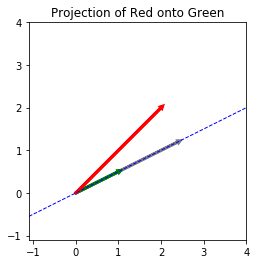

In [0]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,1/2] 
w = [2,2]
proj = np.multiply(2.4,v)

# Set axes
axes = plt.gca()
axes.set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Projection of Red onto Green")
plt.show()

In [0]:
def projection(w,v):
  return np.multiply((np.dot(w,v)/np.dot(v,v)),v)

#Vector Transformations and Dimensionality Reduction

**Linear Transformation** - A mapping $V \rightarrow W$ between two modules (including vector spaces) that preserves the operations of addition and scalar multiplication. Requirements:
1.   T(u + v) = T(u) + T(v)
2.   T(cu) = cT(u)

**Eigenvector** - Any vector that doesn't change its orientation during a given transformation. An eigenvector may still be scaled by a scalar.

**Eigenvalue** - The scalar that represents how a corresponding eigenvector was scaled during a transformation. Eigenvectors and eigenvalues always come in pairs.

**[Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)** - A term that is used to refer to some of the challenges and limitations that arise from trying to process or model datasets with a large number of features (often hundreds or thousands). When the dimensionality increases, the volume of the space increases so fast that the available data become sparse, requiring more data to determine statistical signifigance or find relationships, while increasing the computational load.

##Dimensionality Reduction Techniques

**Feature Selection** - Selecting a subset of the most influential features.

**Feature Extraction** - Create a new, smaller subset that captures the most influential information

##Principle Component Analysis (PCA)

**Principle Component Analysis** - A feature extraction technique that transforms a high dimensional dataset into a new lower dimensional dataset while preserving the maximum amount of information from the original data.

**PCA Process**
1.   Separate the data into X (features) and y (target) variables
2.   Center each column at 0 by subtracting its mean
3.   Divide each column by its standard deviation to get Z
4.   Calculate the variance-covariance matrix of Z
5.   Calculate the eigenvectors and eigenvalues of the variance-covariance matrix
6.   Sort the eigenvalue and eigenvector pairs
7.   Use a matrix transformation to project datapoints onto our eigenvector subspace



In [0]:
from sklearn.prepocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df))
pca = PCA(2) #number of Principle Components to reduce to
pca.fit(scaled)
pca_df = pd.DataFrame(pca.transform(scaled), columns=['PC 1', 'PC 2'])

#Clustering


Machine Learning Overview
- **Supervised**: Labelled outputs
    - Classification: Discrete output cagetories
    - Regression: Continuous output values
- **Unsupervised**: Outputs are not labelled
- **Reinforcement**: Rewards/punishments for "behaviors"

**Clustering** - The assignment of a set of observations into subsets (called clusters) so that observations in the same cluster are similar in some sense. Clustering is a method of unsupervised learning. Process for clustering given a set of points in n-dimensional space:

1. Select k random points to act as initial centroids (one point for each cluster)

2. Find the cluster of points surrounding that centroid (assign points to the centroid that they lie closest to)

3. Calculate a new centroid for the cluster

4. Repeat steps 2 & 3 until the model converges

**K-Means Clustering** - An algorithm to find groups in the data, with the number of groups represented by the variable K, with the center of each group being the mean. Selecting the number of groups can be done visually through the use of an elbow graph and looking for where the slope decreases the most.


In [0]:
#train and fit a model with n_clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

#add a new column with the cluster labels
df['clusters'] = kmeans.labels_

In [0]:
#Elbow graph
distortions = []
k = range(1,10)
#fit a model from 1 to 10 clusters, and plot it to view inflections
for i in k:
  k_model = KMeans(n_clusters=i).fit(points)
  distortions.append(k_model.inertia_)
  
plt.plot(k,distortions)
plt.show()

In [0]:
# Plotting clusters function from lecture, why reinvent the wheel
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'blue'}
  fig, ax = plt.subplots()
  plt.title('k-means clustering')
  
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', 
               label=key, color=colors[key])
  plt.show()

def get_centroids(df,column):
  return df.groupby(column).mean()

#No Free Lunch

The no free lunch principle states that the more an algorithm is optimized to solve one specific kind of problem, the worse it gets at solving all other kinds of problems.

1) There are always tradeoffs when selecting from different approaches. Understanding those tradeoffs and justifying the choice of methodology is just as important as actually doing the work itself.

2) The only way that we can choose one approach over another is to make assumptions about the data. If we don't know anything about the characteristics of the data, then we can't make an informed choice of algorithm.